# INFO 2950 Group Project: What Makes a Nobel Prize Laureate?

## Introduction

Context

The main question we were interested in exploring was: what characteristics are likely among Nobel laureates, and what biases do those characteristics potentially reveal within the Nobel committee?

Due to the scope of this project, we focused on a few more specific areas for our analysis:  
    
What countries produce the most Nobel laureates? 
    
Are Nobel laureates more likely to hail from the Anglosphere? 
    
Does age have any bearing on the awarding of a Nobel Prize? 
    
Are Nobel Prize laureates getting older?

Main findings/brief summary

## Data Description

#### What are the observations (rows) and the attributes (columns)?

The observations in our data frame are 937 Nobel Prize laureates, representing all winners from the first prizes awarded through the year 2016. In other words, each row represents a single laureate.

The attributes are:

- id - identifies each laureate 
- firstname - laureate's first name 
- surname - laureate's surname 
- born - laureate's birth date 
- died - laureate's death date 
- bornCountry - laureate's birth place 
- bornCountryCode - the country code of the laureate's country of origin
- bornCity - the name of the city where the laureate was born
- diedCountry - the name of the country where the laureate died
- diedCountryCode - the country code of the laureate's country of death
- diedCity - the name of the city where the laureate died
- gender - laureate's gender or laureate's organization ('male,' 'female,' or 'org' - organization)
- year - the year that the laureate won their prize
- category - the category in which the laureate won their prize ('physics,' 'chemistry,' 'peace,' 'medicine,' 'literature,' 'economics')
- overallMotivation - overall motivation for being awarded the prize
- share - number of other laureates who share the prize 
- motivation - the motivation behind being awarded the prize

#### Why was this dataset created?

The dataset was assembled by Maryna Kuzmenko in 2016, and intended to be a starting point for social sciences research into the characteristics of Nobel prize awards and laureates (both quantitative and categorical). It is available through the Harvard Dataverse Repository. 

#### Who funded the creation of the dataset?

Harvard's Dataverse Repository is free and open to researchers for sharing and archiving research data. Maryna Kuzmenko holds a Doctorate of Philosophy; no information on the funding for the creation of this particular dataset is available, but it appears to have been created while she was pursuing her doctorate at Kyiv University. 

#### Are there any errors, sources of noise, or redundancies in the dataset?

We were able to identify one section of rows that seemed to be included erroneously (containing no data except for the gender characteristic, and not matching with any potential missing data that we could find). As such, we removed those rows from the dataset before continuing with our own analysis.

#### Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.

By the nature of our dataset, each instance is identifiable as a specific person, by name, location, age, and more. This was determined not to be a privacy concern, because of the public nature of the Nobel Prize and its laureates.  

#### What processes might have influenced what data was observed and recorded and what was not?

Fortunately for us, the Nobel Prize is a prestigious and public-facing award for excellence in a field; as such, information about each year's awards, and the laureates who received them, is generally well-documented. We are reassured by the completeness of our dataset: though not every row is perfectly complete, as a whole data on each laureate is present and accurate (by our appraisal). 

#### What preprocessing was done, and how did the data come to be in the form that you are using?

The data on each laureate was collected into a single .csv file, with each instance representing a single Nobel Prize winner, and columns with characteristics about each of those instances. The entire population of laureates (through 2016) is represented, and no transformations or further processing was done to the data once collected. 

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Though there is no record that the Nobel laureates that were living at the time this dataset was assembled were notified, the data collected about them (as at least semi-public figures) is publicly available. 

#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)

https://drive.google.com/file/d/1x30zuyFBpWepBgc7cQt9x1yU46Qscgtg/view?usp=sharing

## Preregistration Statement

Something more verbose here???? 

##### Hypothesis 1:
Nobel laureates are not more or less likely to win at a certain age. ($\beta_{age}$ = 0)

##### Hypothesis 2:
Nobel Laureates are more likely to come from English-speaking countries. ($\beta_{English-speaking}$ > 0)

## Data Analysis

In [7]:
import pandas as pd 
import numpy as np
import seaborn 
from matplotlib import pyplot
from datetime import datetime, date

nobel_data = pd.read_csv('nobel_data_final.csv')

#### Section 1: Age of a Nobel laureate

To begin analysis of Nobel laureate age, we created a new dataframe, nobel_data_valid, without any "age" values that are 0 so that we can create models using the "age" column without instances that are missing their ages. Nearly all of these rows represent organizational winners, rather than individuals, so the age data for these instances would not be relevant to our analysis.

In [8]:
nobel_data_valid = nobel_data.loc[nobel_data['age']!=0]

Text(0.5, 1.0, 'Number of Nobel Prizes Awarded, by Age at Time of Award')

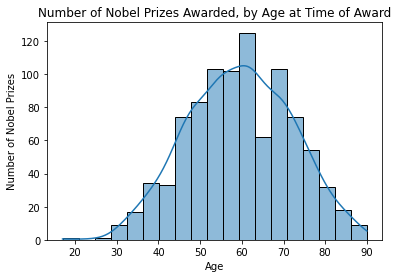

In [9]:
histplot = seaborn.histplot(nobel_data_valid['age'], kde=True)
histplot.set_xlabel('Age')
histplot.set_ylabel('Number of Nobel Prizes')
histplot.set_title('Number of Nobel Prizes Awarded, by Age at Time of Award')

In [10]:
print("The mean age of a Nobel laureate is "+str(nobel_data_valid['age'].mean())+", with a standard deviation of "+str(nobel_data_valid['age'].std())+".")

The mean age of a Nobel laureate is 59.4593147751606, with a standard deviation of 12.384339675481367.


The histogram shows that Nobel Prize laureates usually win at around the age of 60. As Age increases to around 60, there is an overall increase in the Count of Nobel Prizes. However, after around age of 60, as Age increases, there is an overall decrease in the Count of Nobel Prizes. There are some peaks around the age of 60, so we could look into how the mean age of a Nobel laureate varies across categories.

In [12]:
medicine = nobel_data_valid.loc[nobel_data['category']=='medicine','age'].mean()
print("The mean age of a Nobel laureate in Medicine is "+str(medicine))

The mean age of a Nobel laureate in Medicine is 57.830357142857146


In [13]:
physics = nobel_data.loc[nobel_data['category']=='physics','age'].mean()
print("The mean age of a Nobel laureate in Physics is "+str(physics))

The mean age of a Nobel laureate in Physics is 55.351351351351354


In [14]:
chemistry = nobel_data.loc[nobel_data['category']=='chemistry','age'].mean()
print("The mean age of a Nobel laureate in Chemistry is "+str(chemistry))

The mean age of a Nobel laureate in Chemistry is 57.83505154639175


In [15]:
economics = nobel_data.loc[nobel_data['category']=='economics','age'].mean()
print("The mean age of a Nobel laureate in Economics is "+str(economics))

The mean age of a Nobel laureate in Economics is 66.34939759036145


In [16]:
literature = nobel_data.loc[nobel_data['category']=='literature','age'].mean()
print("The mean age of a Nobel laureate in Literature is "+str(literature))

The mean age of a Nobel laureate in Literature is 64.67256637168141


There are slight variations in the mean across Medicine, Physics, and Chemistry but the mean age of a Nobel laureate stays around in late 50s. There are also slight variations in the mean across Economics and Literature, but the mean age of a Nobel laureate stays around late 60s.

In [10]:
nobel_data_valid.groupby('year', as_index = False)["age"].mean()

,year,age
0,1901.0,61.000000
1,1902.0,56.285714
2,1903.0,52.000000
3,1904.0,63.000000
4,1905.0,59.200000
...,...,...
108,2012.0,65.285714
109,2013.0,70.866667
110,2014.0,58.615385
111,2015.0,73.000000


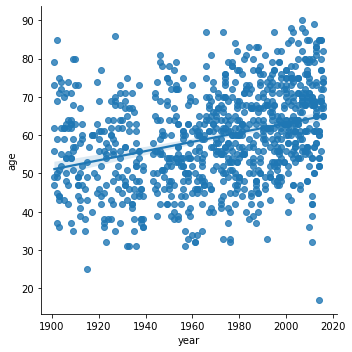

In [11]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age')

There is an increasing trend above, showing that Nobel Prize laureates are winning at a later age over time with some outliers. There are few outliers that stand out, such as a laureate who seemed to have won their prize at an age of around 25 close to the year 1915 and anoher who seemed to won their prize at an age of around 15 close to the year 2016.

Conclusion: As shown above, age has bearing on the likelihood of winning a Nobel Prize. A typical age of Nobel Prize laureate at the time of win is 59.4593147751606. When we looked closer at the mean of age in the five categories, there are differences in the age of a typical laureate. We noticed that Nobel Prize laureates are more likely to win in late 60s for Economics and Literature, but winning at late 50s is more likely for Medicine, Physics, and Chemistry. 

#### Section 2: Nobel Awards by country

In [28]:
laur_countries = nobel_data['bornCountryCode'].value_counts()
laur_countries.head()

US    275
GB    102
DE     89
FR     56
PL     30
Name: bornCountryCode, dtype: int64

In [26]:
least_laur_countries = laur_countries.sort_values(ascending = True)
print(least_laur_countries[])

BG    1
ZW    1
YE    1
TW    1
CY    1
Name: bornCountryCode, dtype: int64


## Evaluation of Significance

## Interpretation and Conclusions

## Limitations

One primary limitation of our data is that it was collected in 2016: there have been 6 years' worth of laureates since then, and thus 6 years of data we cannot work with. It is also of some concern that the most recent years are missing: if there are any trends over time in our data, this might limit our ability to accurately model those trends or make predictions. For example, with the raising awareness of gender equality and female awakening efforts in academia, a notable increase in female laureates occurred in the 6 years (2016-2022). 12 women won Nobel in that 6 years, and the total number of female laureates before 2016 is around 60. Therefore, we weren’t able to analyze the rapid change in gender bias. Additionally, a big health challenge, COVID, happened in the three years of the six years with missing data, so we couldn’t analyze how COVID played a role in scientific breakthroughs. Additionally, all the organizations and some people have missing data, such as birth dates, which means that we have to work around those missing data to complete our data analysis.

## Source Code

The shared repository for our project (which holds our source data as well as files for each phase of the project) can be found at: 

https://github.com/qbello22/2950-Project

## Acknowledgements

Harvard Dataverse Repo & 